In [1]:
#Import Libraries

import matplotlib
%matplotlib inline
from simulation import *
from scipy.special import comb
import numpy as np
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [333, 124, 224, 318, 24, 207, 36, 47, 432, 388, 365, 345, 137, 128, 207, 193, 435, 447, 464, 353, 29, 166, 30, 345, 306, 144, 61, 80, 33, 14, 433, 22, 415, 203, 185, 360, 446, 218, 191, 112, 65, 355, 82, 217, 5, 56, 427, 453, 274, 103] 
Slist :  [300]


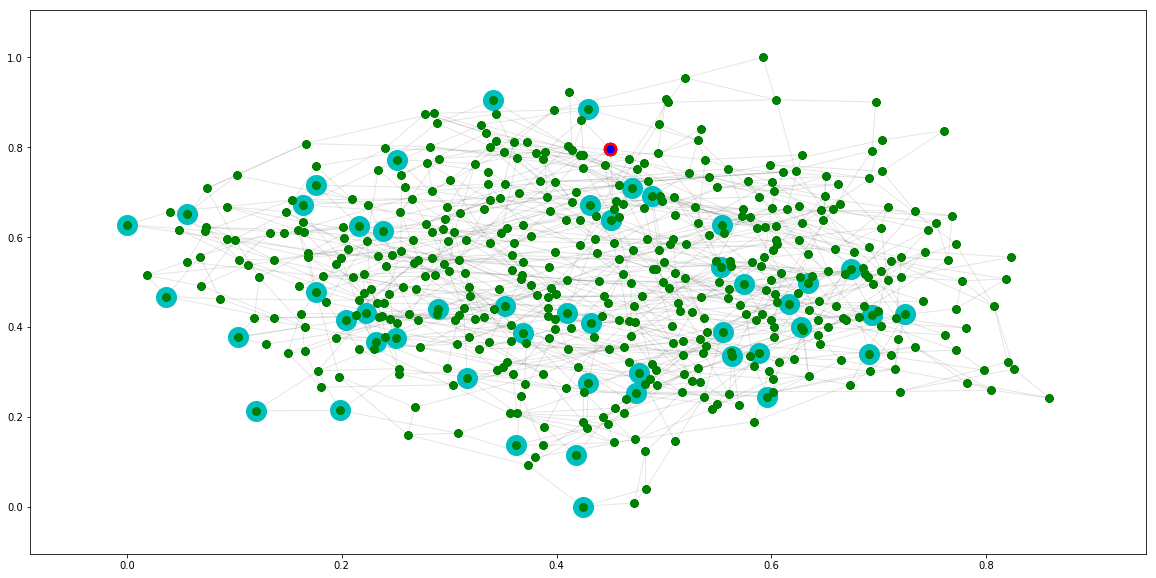

Starting infection


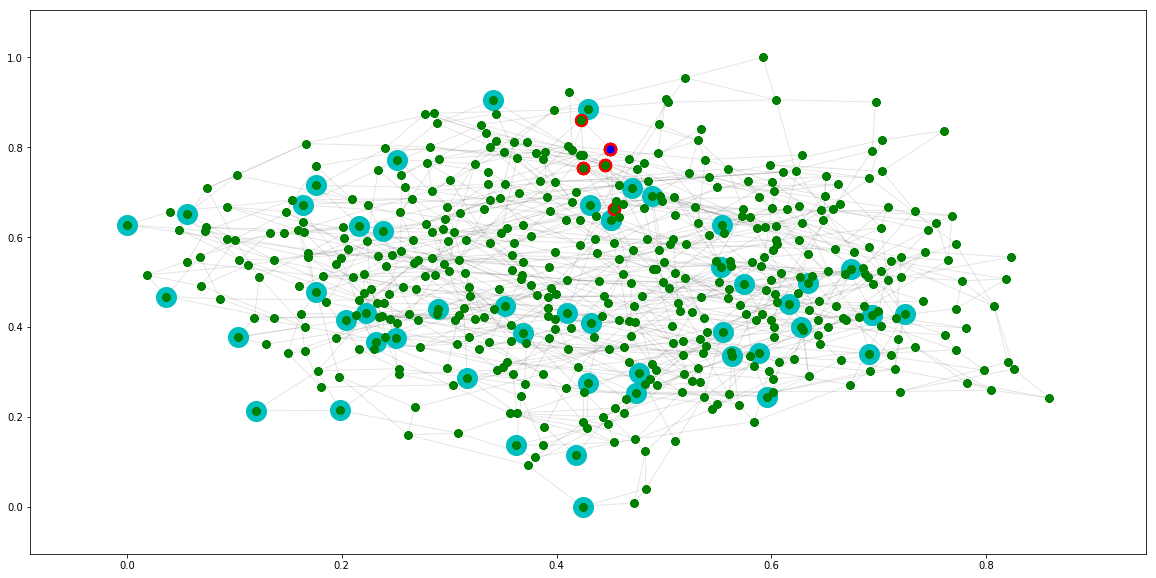

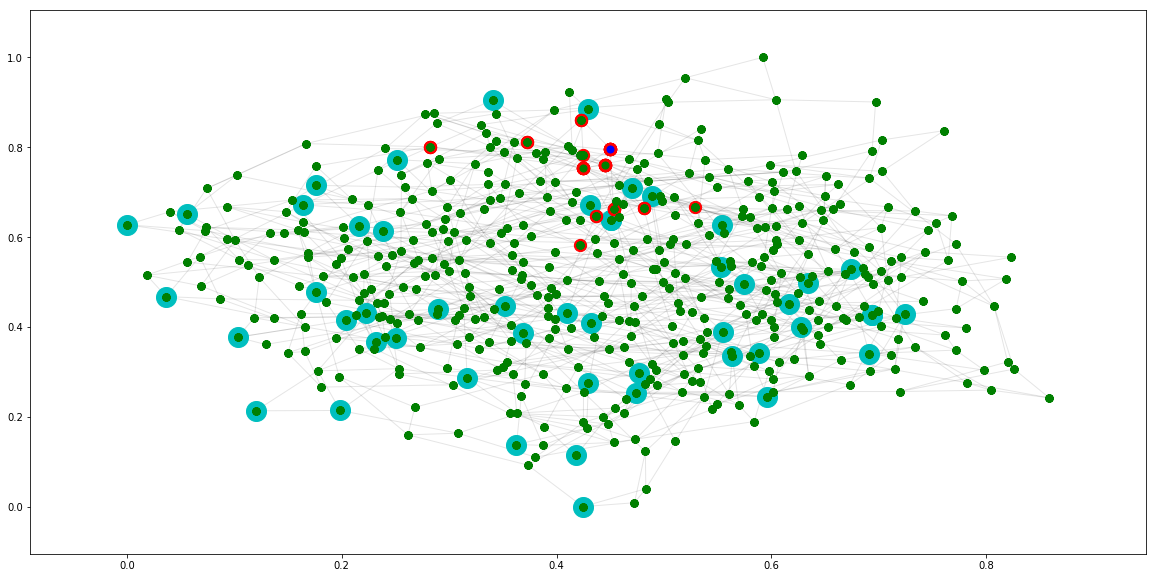

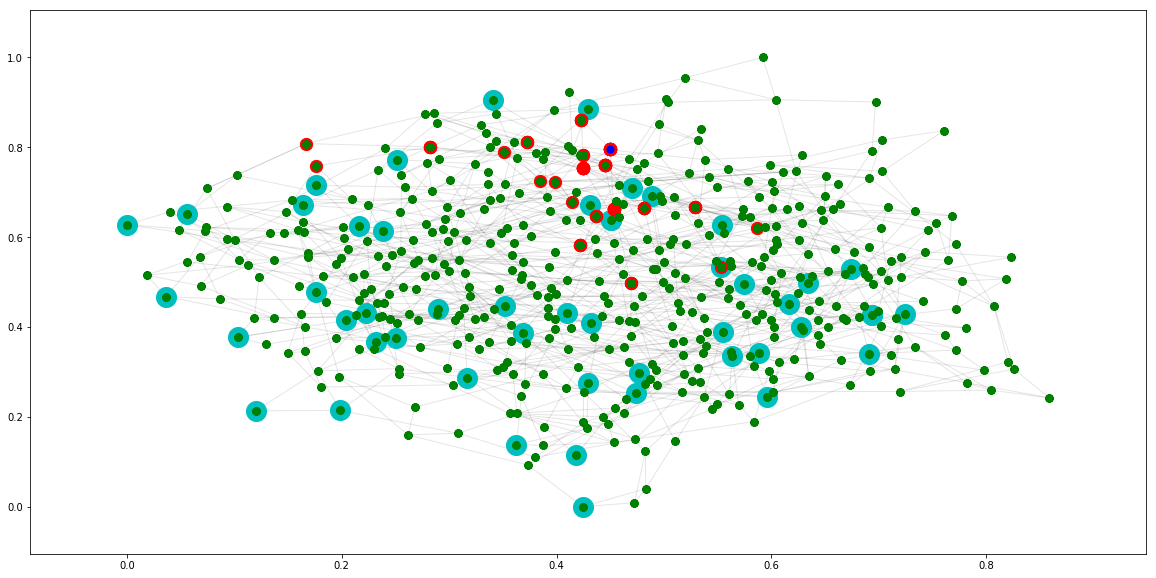

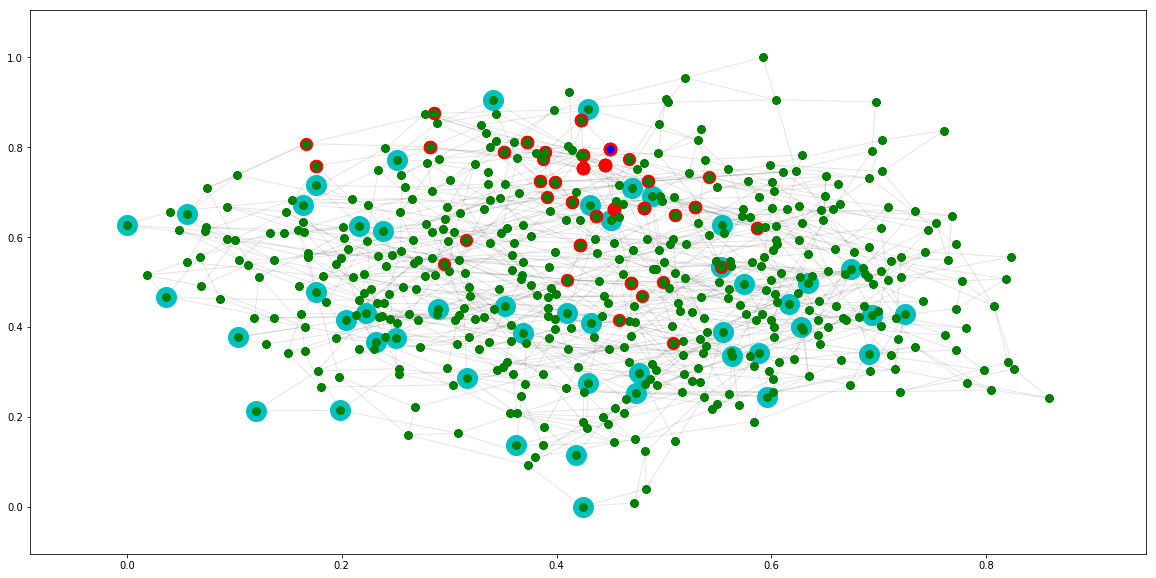

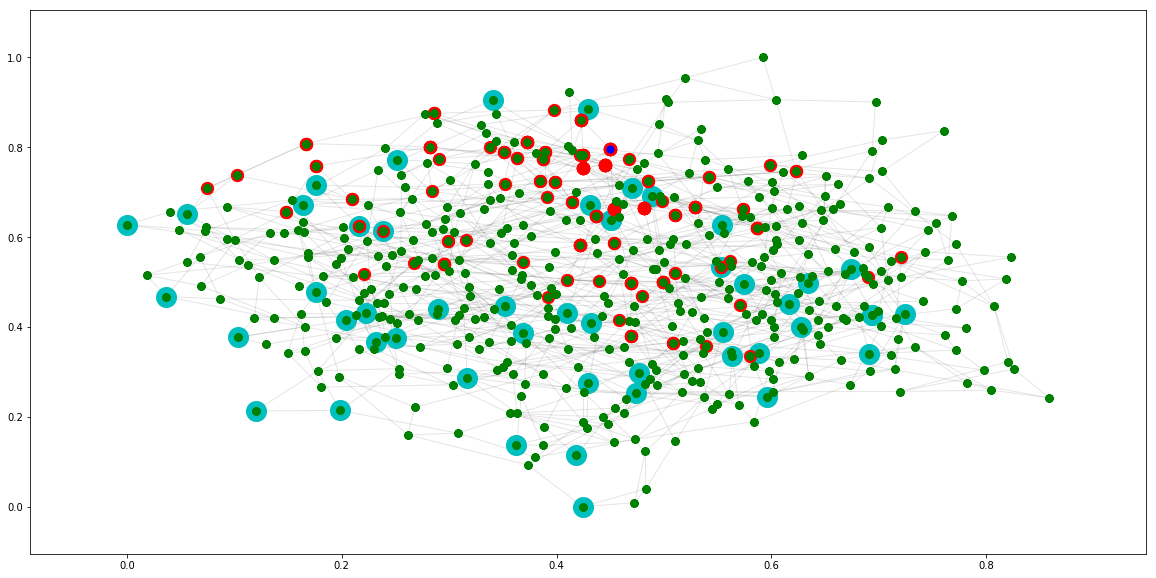

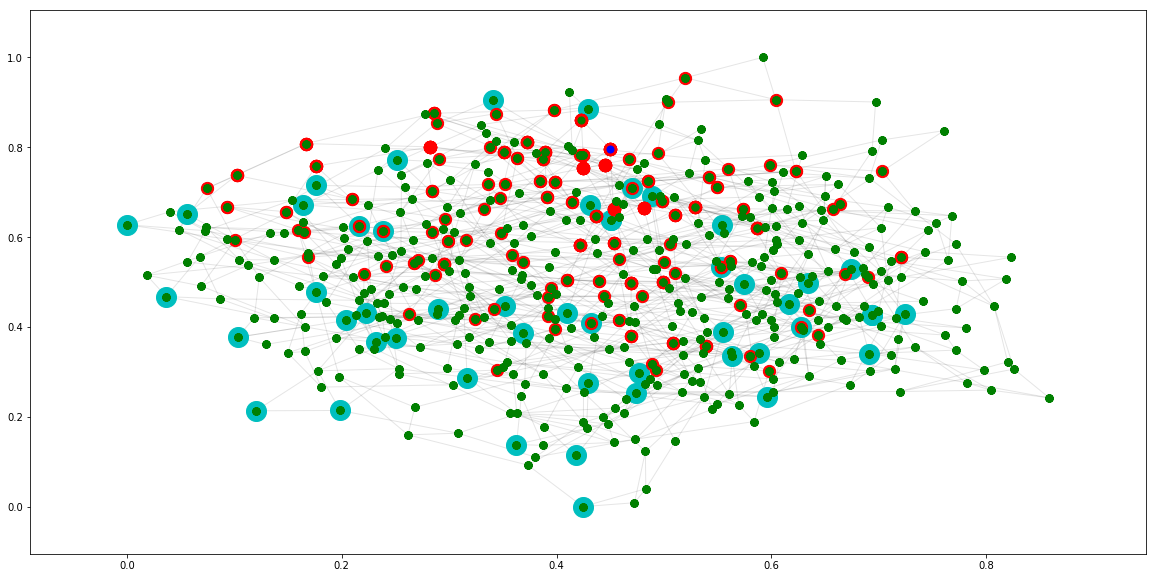

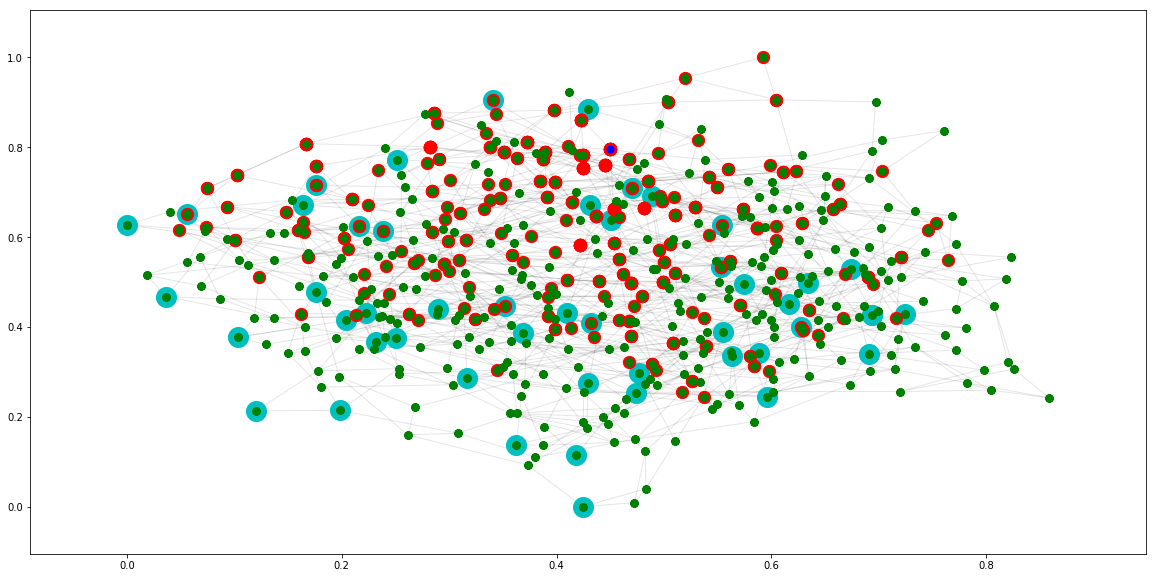

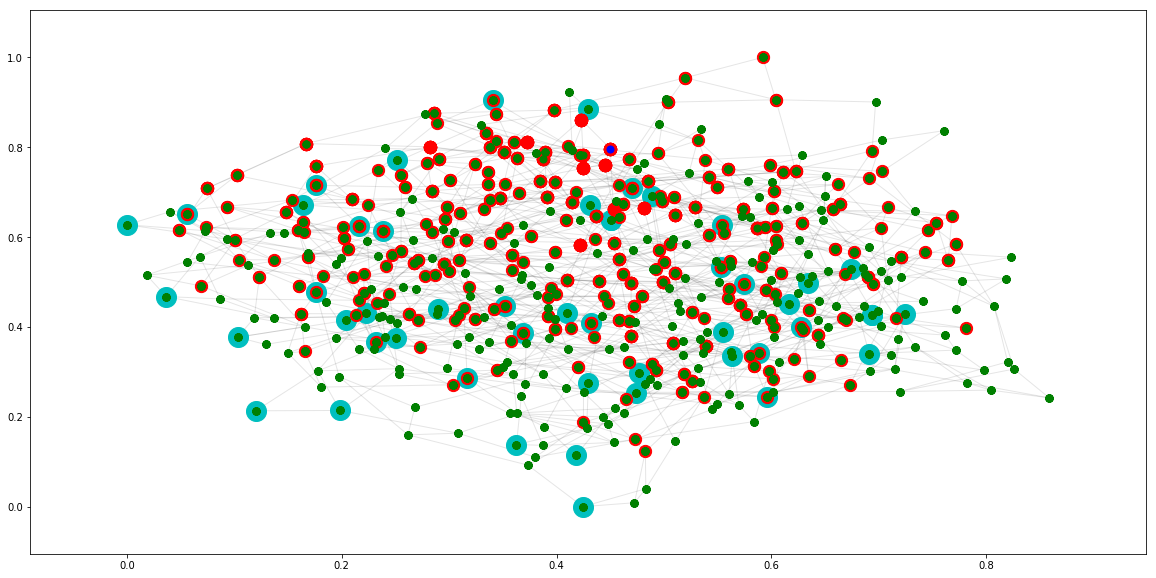

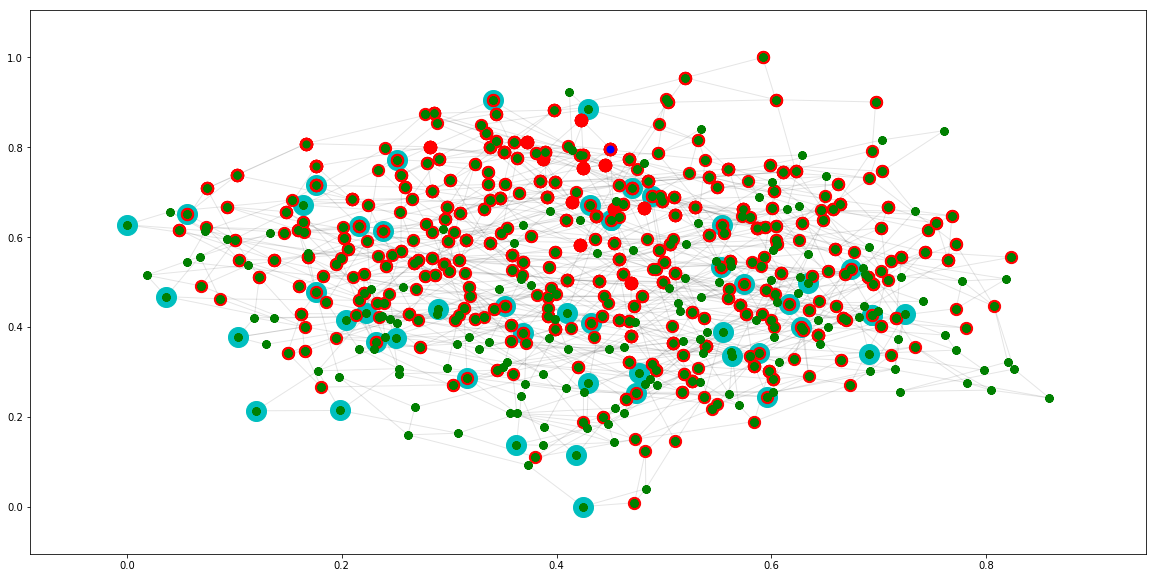

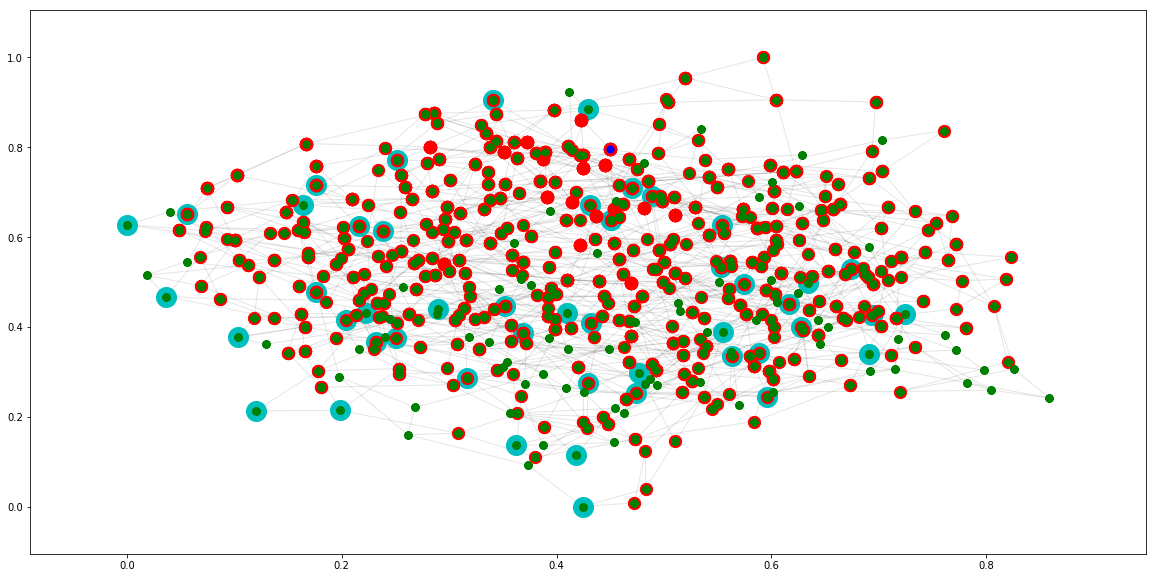

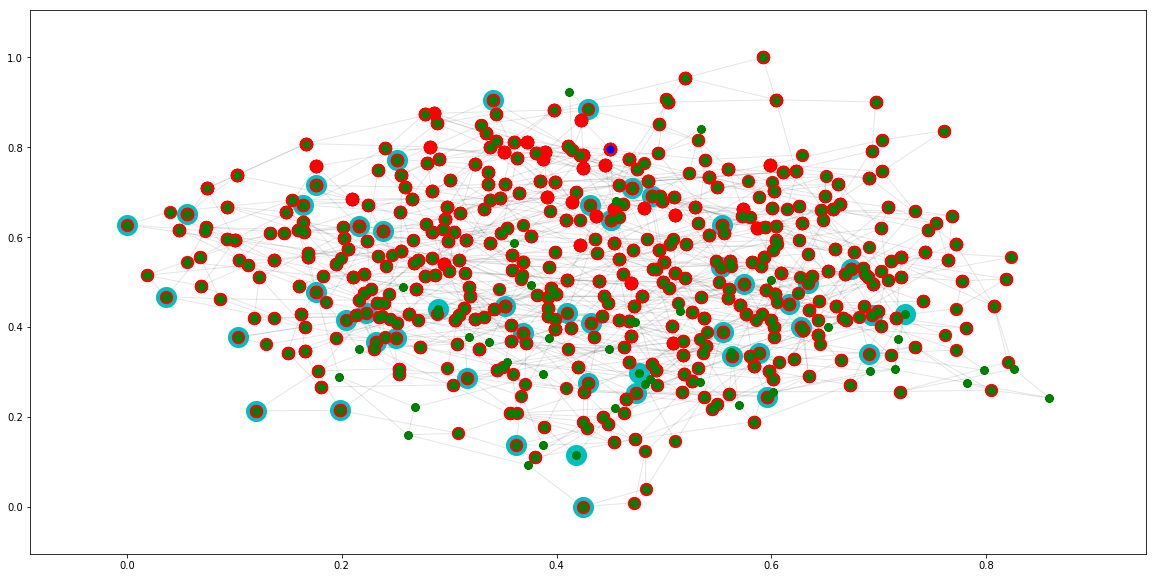

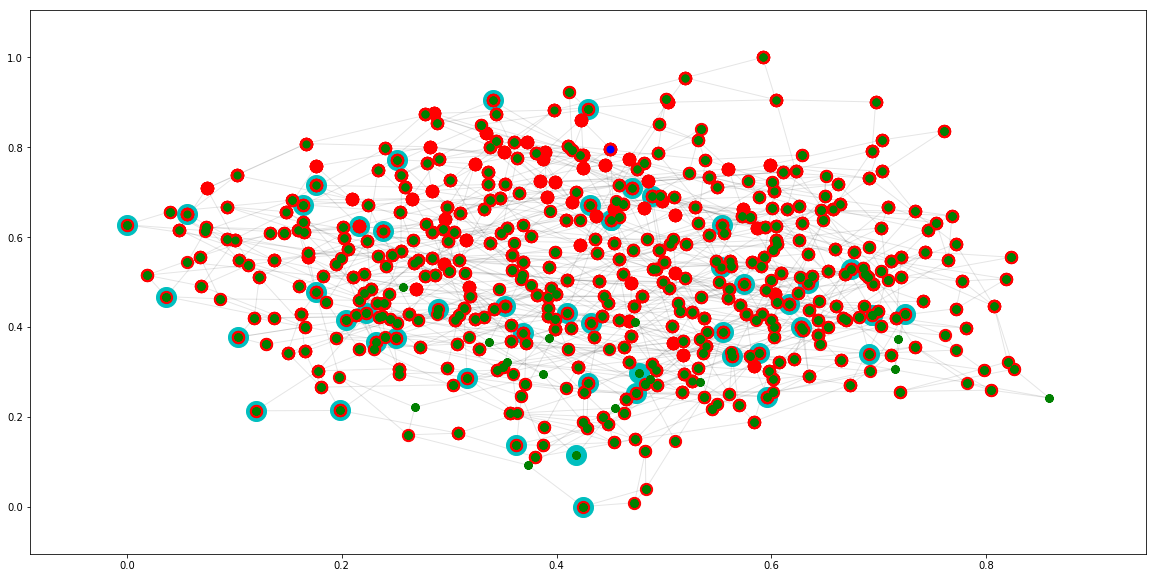

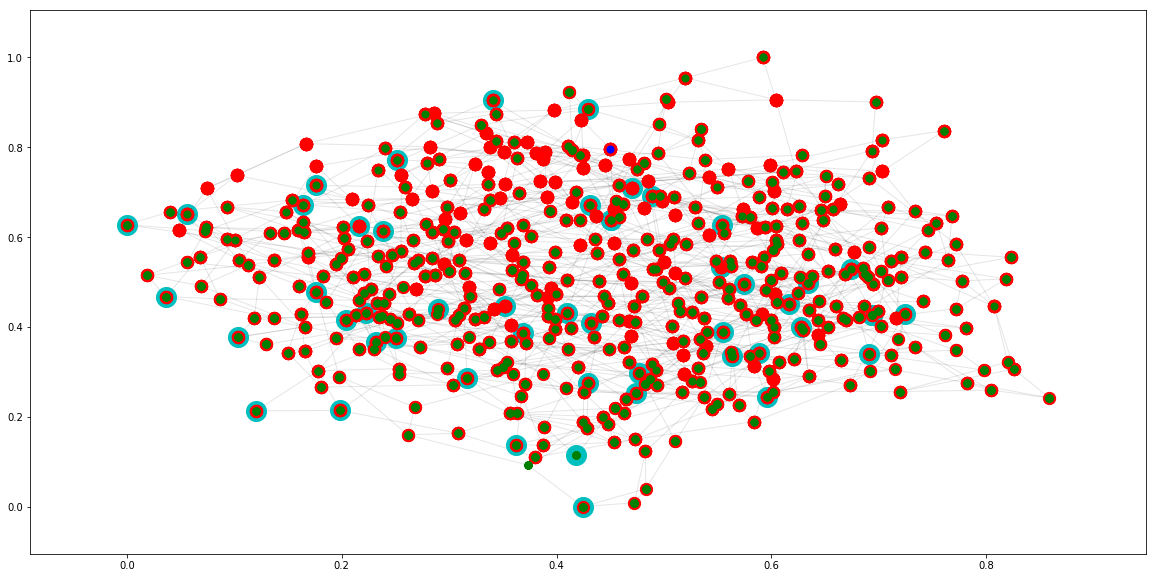

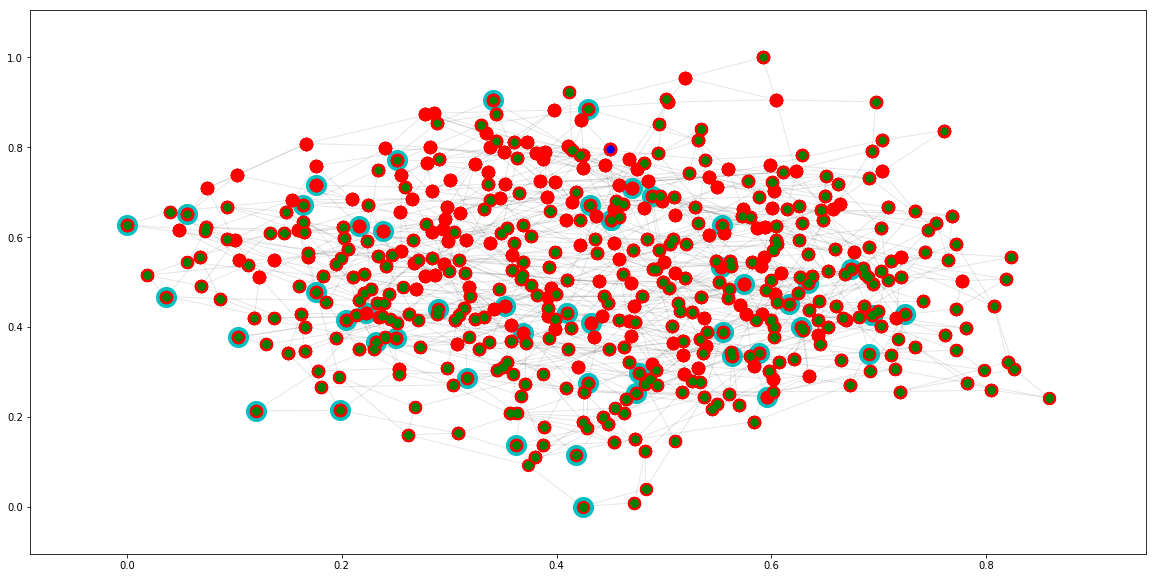

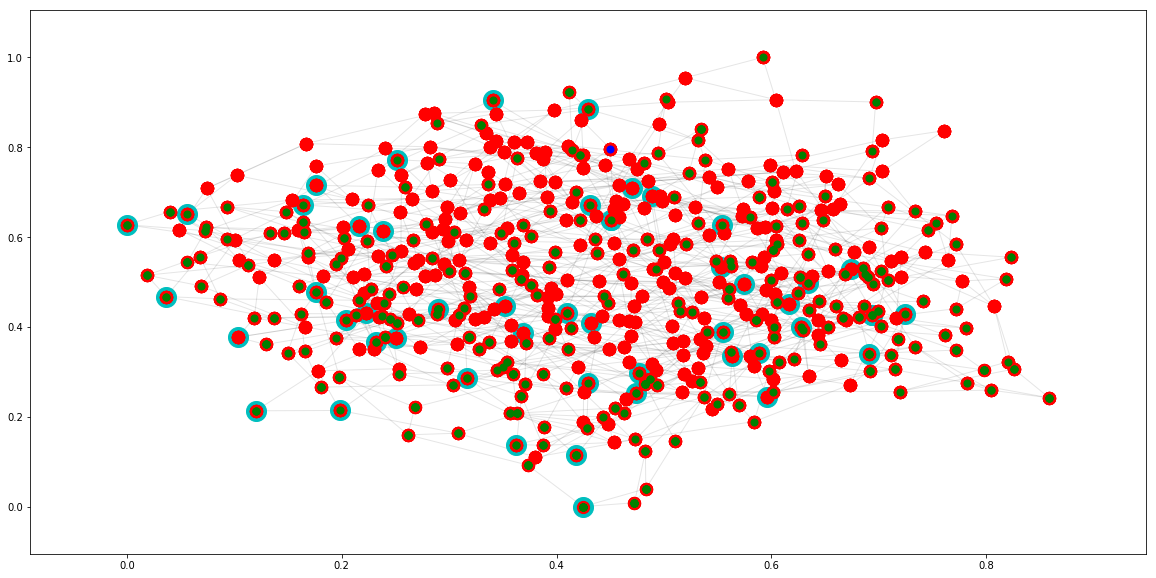

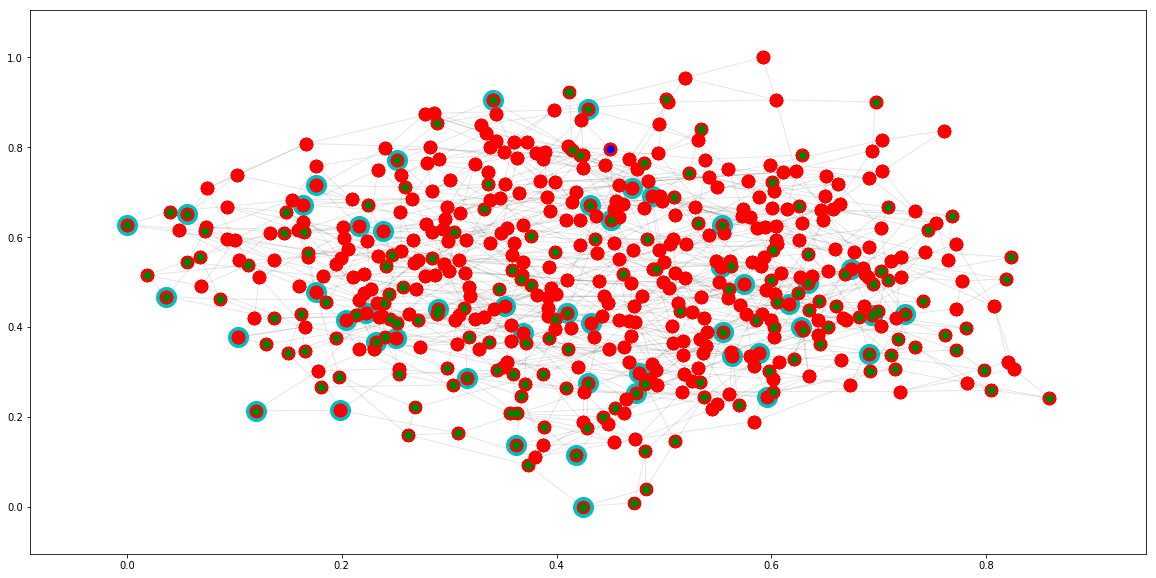

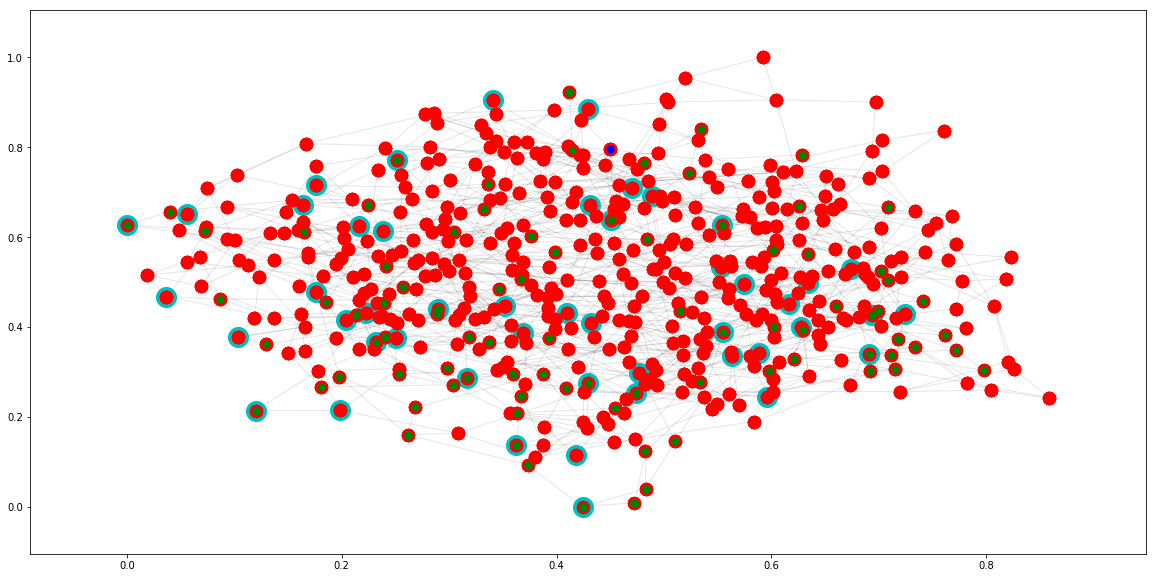

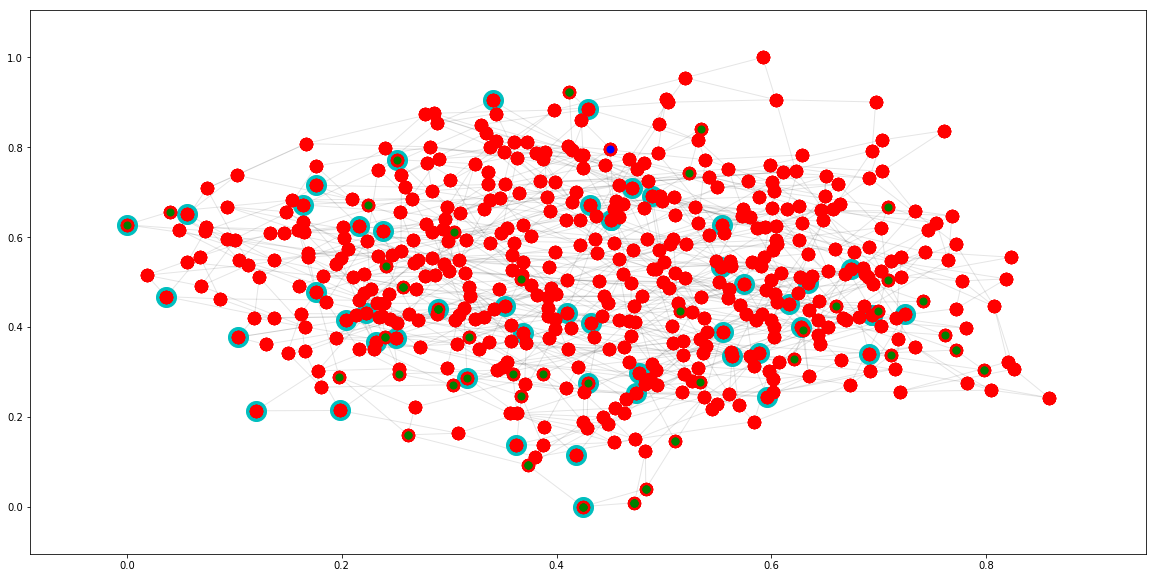

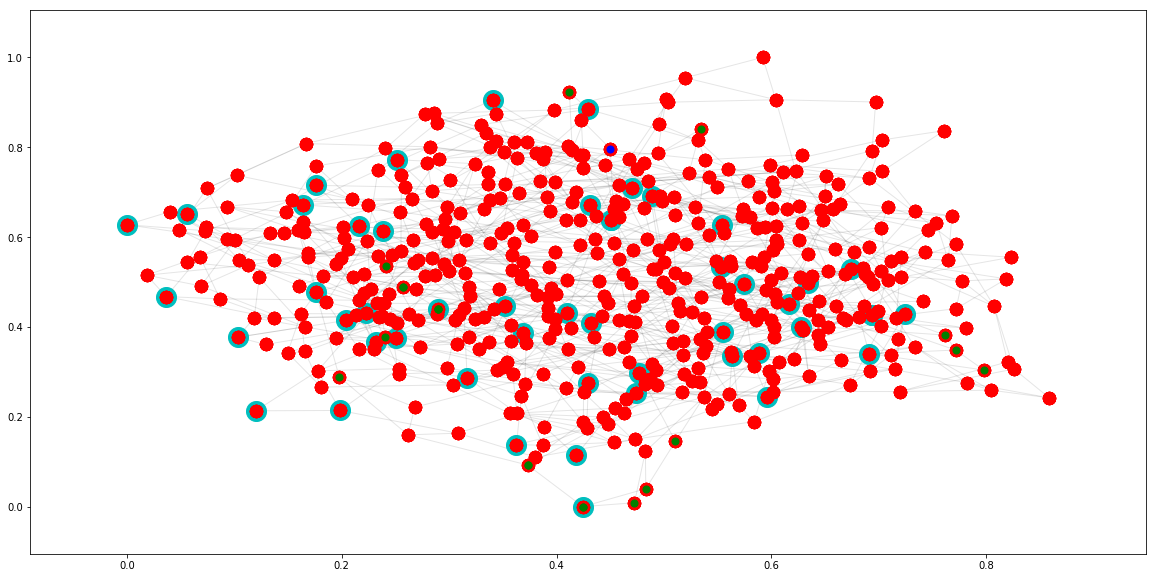

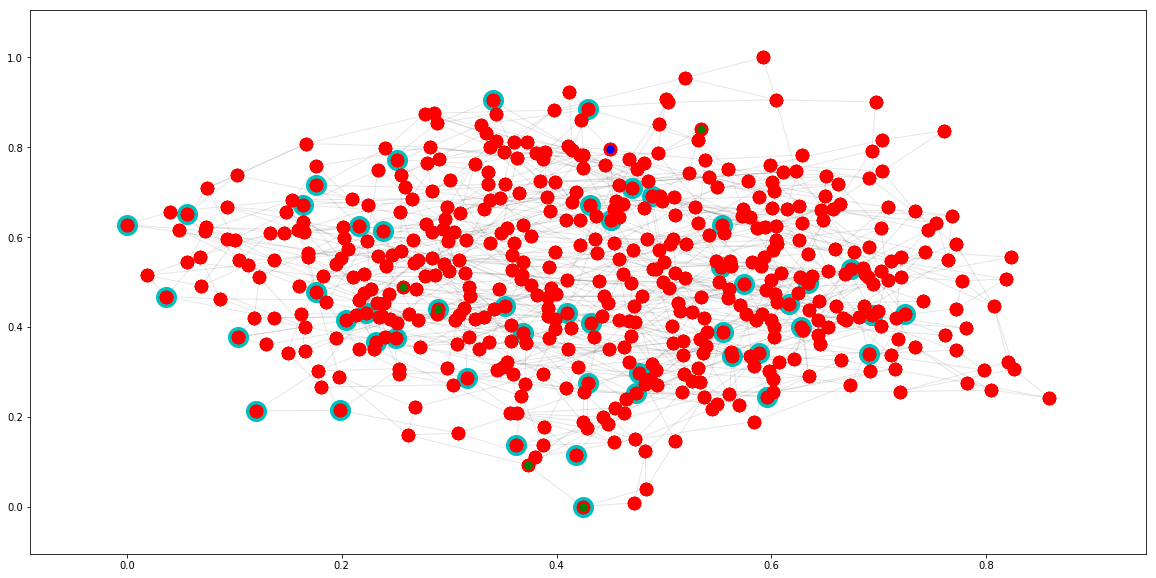

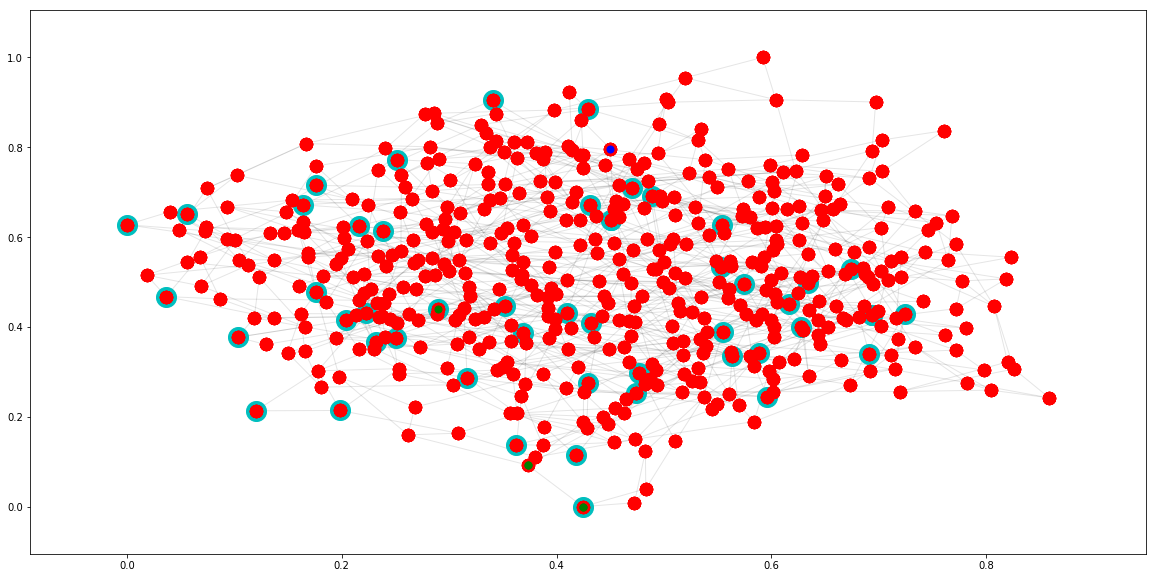

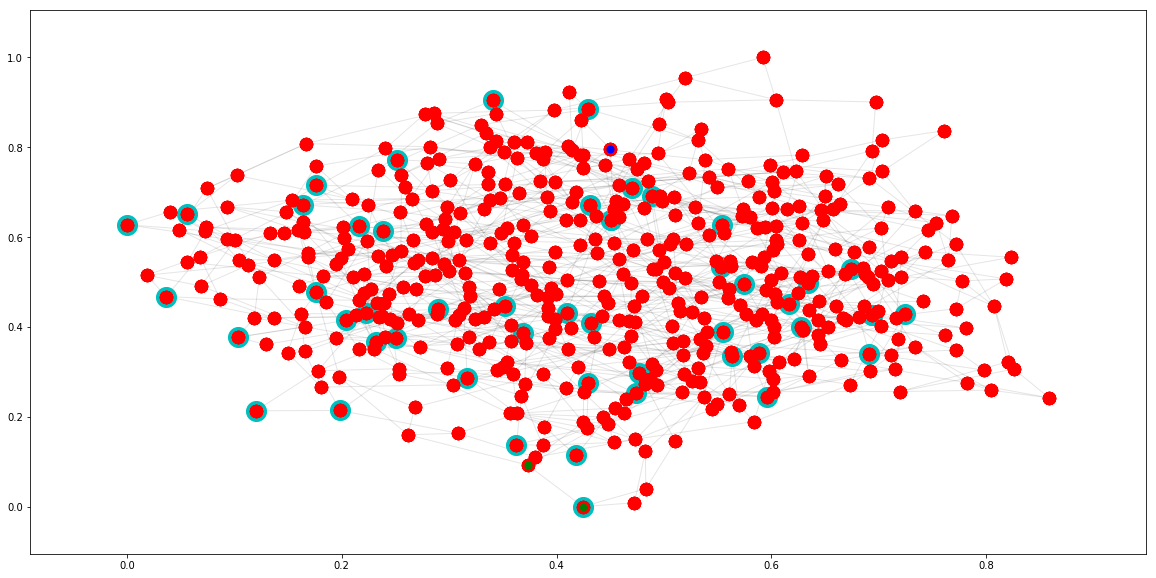

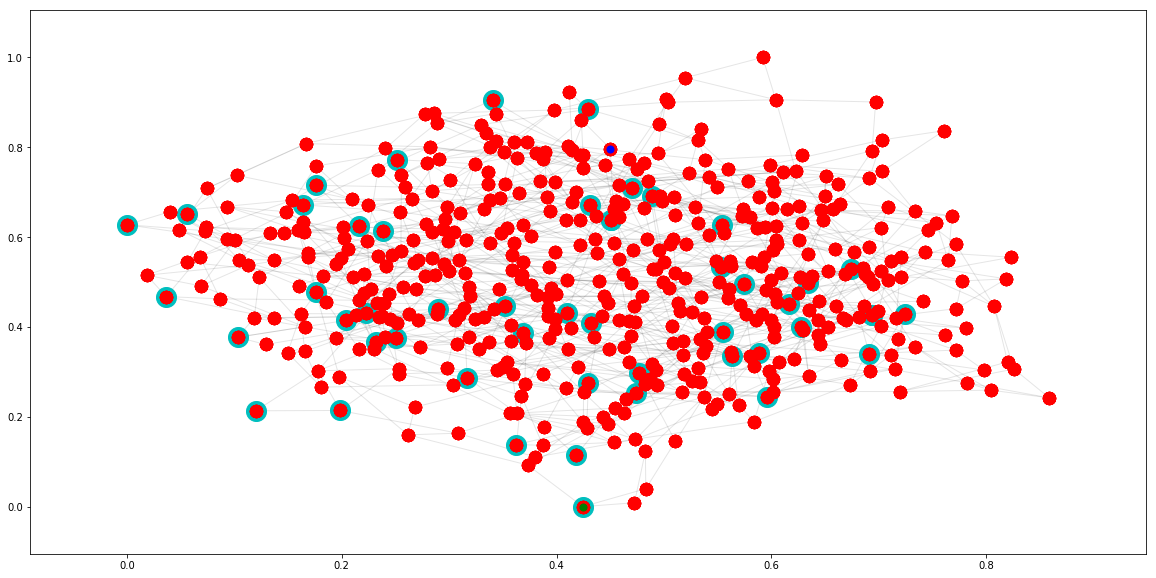

In [4]:
#Run the simulation

figureList = list()
# Parameters definition
numRumors = 10
maxThreshold = 1
numMonitors = 50
propagProba = 0.3
numNodes = 500
linkProba = 0.3
monitorTrigger = list()
numStep = 100

j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)
fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')
print("Starting infection")
infections = [[] for n in range(numRumors)]
infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
    
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))
print("DONE")

In [5]:
# Test with sets of nodes intersections
setList = []

for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
plt.show()
#fig.savefig('./TestFigs/figENDD'+'.png')





Real Source =  300
Detected Source =  [387, 269, 270, 164, 43, 300, 301, 174, 175, 173, 302, 171, 172, 60, 62, 63, 64, 320, 323, 334, 336, 100, 357, 230, 231, 486, 104, 234, 102, 232, 101]


<module 'networkx' from 'C:\\Users\\Robin\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages\\networkx\\__init__.py'>